In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline


In [2]:
url = 'https://raw.githubusercontent.com/jacobstallone/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv'

In [3]:
df = pd.read_csv(url)

In [4]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
print ('\n Data Types:')
print (df.dtypes)


 Data Types:
Month          object
#Passengers     int64
dtype: object


In [6]:
df['Month'] =df['Month'].apply(pd.to_datetime)

In [7]:
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [8]:
df.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [9]:
from datetime import datetime
con = df['Month']
df.set_index ('Month', inplace=True)
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [10]:
ts = df['#Passengers']
ts.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [11]:
ts['1949-01-01':'1949-05-1']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [12]:
ts['1949']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64

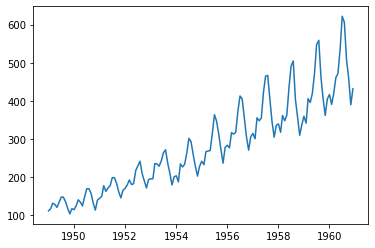

In [13]:
plt.plot(ts)

In [14]:
import seaborn as sm
import matplotlib.style as style
style.use('fivethirtyeight')


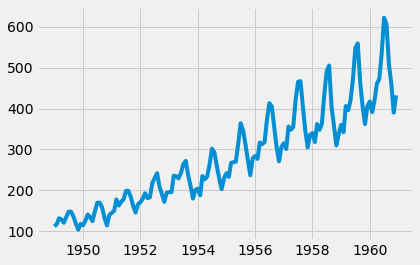

In [15]:
plt.plot(ts)

In [16]:
from statsmodels.tsa.stattools import adfuller

In [17]:
dftest = adfuller(ts)[:4]
dftest

(0.8153688792060418, 0.9918802434376409, 13, 130)

In [18]:
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used',
                    'Number of observations Used'])
print (dfoutput)

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of observations Used    130.000000
dtype: float64


p-value is over .05 so it is not stationary. So lets make it stationary.


In [19]:
#Determine rolling statistics
def test_stationarity(timeseries):

    rolmean =timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    
#plot rolling statistics against dataset
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend (loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    print('Results of the Ajusted Dickey-Fuller Test')
    dftest = adfuller(timeseries)
    dfoutput = pd.Series(dftest [:4],index=['Test Statistic', 'p-value', '#Lags Used',
                    'Number of observations Used'])
    print (dfoutput)
        
    

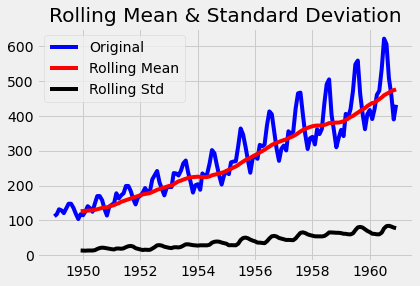

Results of the Ajusted Dickey-Fuller Test
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of observations Used    130.000000
dtype: float64


In [20]:
test_stationarity(ts)

We need to make the series stationary.

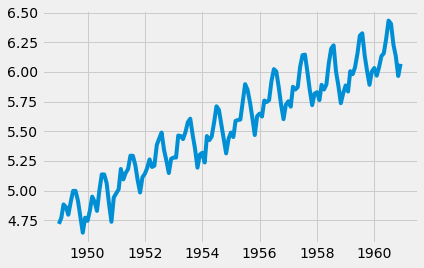

In [21]:
ts_log = np.log(ts)
plt.plot(ts_log)

Smoothing using rolling average and Aggression by taking the mean over the year.

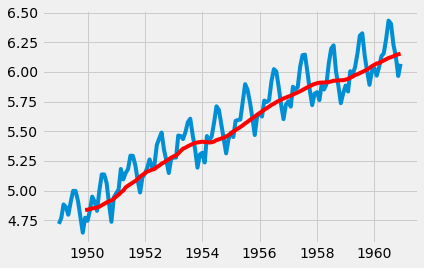

In [22]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [23]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
Name: #Passengers, dtype: float64

In [24]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head(12)

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
1950-05-01   -0.027529
1950-06-01    0.139881
1950-07-01    0.260184
1950-08-01    0.248635
1950-09-01    0.162937
1950-10-01   -0.018578
1950-11-01   -0.180379
Name: #Passengers, dtype: float64

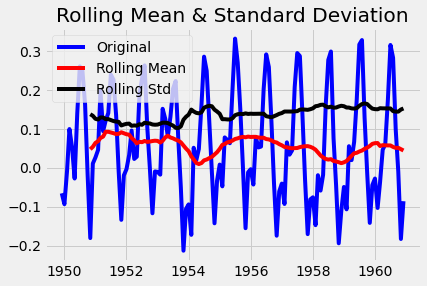

Results of the Ajusted Dickey-Fuller Test
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of observations Used    119.000000
dtype: float64


In [25]:
test_stationarity(ts_log_moving_avg_diff)

The p-value is pretty good. We could keep on looking for a better p-value than .022, but we'll go with this.


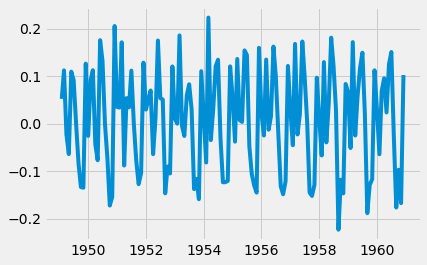

In [26]:
ts_log_diff = ts_log -ts_log.shift()
plt.plot(ts_log_diff)

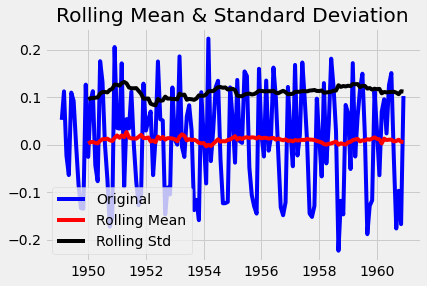

Results of the Ajusted Dickey-Fuller Test
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of observations Used    128.000000
dtype: float64


In [27]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

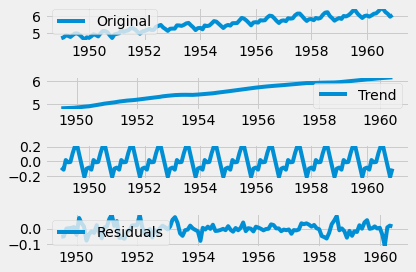

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

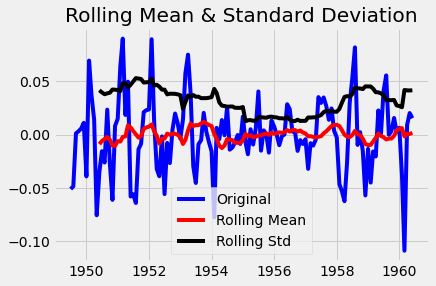

Results of the Ajusted Dickey-Fuller Test
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of observations Used    1.220000e+02
dtype: float64


In [29]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)


This is soooooo stationary. Now we move to ACF and PACF to figure out the pdq for the ARIMA model.


In [30]:

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1024: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(


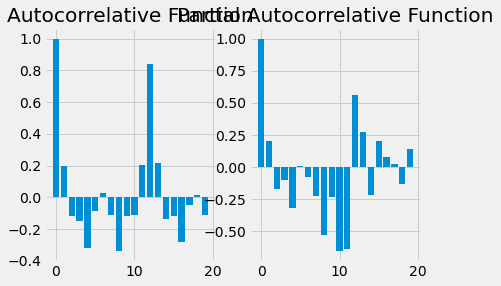

In [31]:
acf_vals =acf(ts_log_diff)
pacf_vals= pacf(ts_log_diff)
num_lags=20

plt.subplot(121)
plt.bar(range(num_lags),acf_vals[:num_lags])
plt.title('Autocorrelative Function')

plt.subplot(122)
plt.bar(range(num_lags), pacf_vals[:num_lags])
plt.title('Partial Autocorrelative Function')
plt.show()

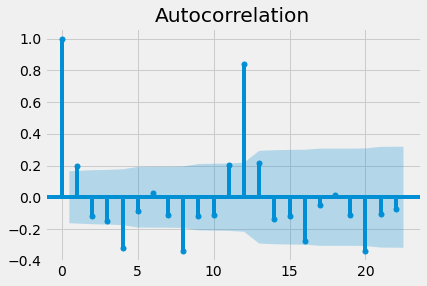

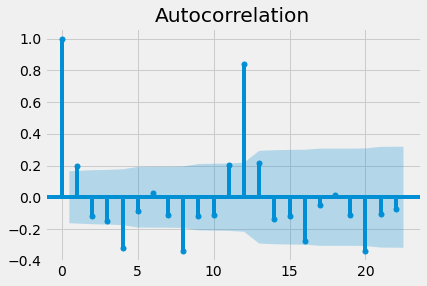

In [32]:
plot_acf(ts_log_diff)

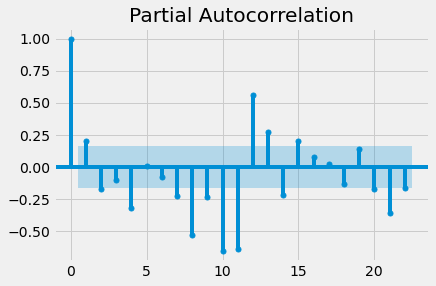

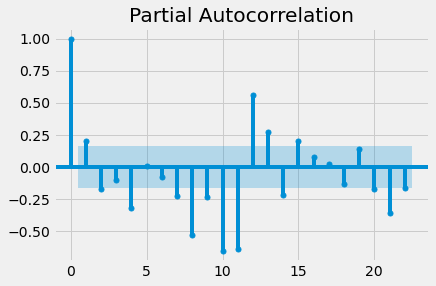

In [33]:
plot_pacf(ts_log_diff)

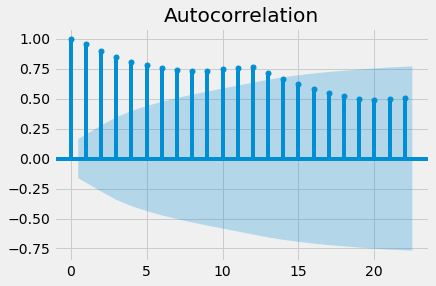

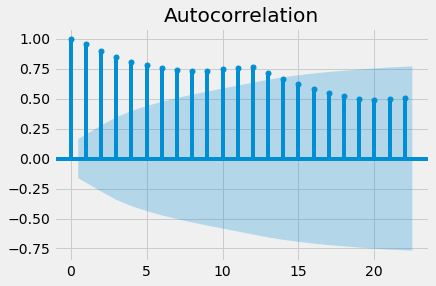

In [34]:
plot_acf(ts_log)

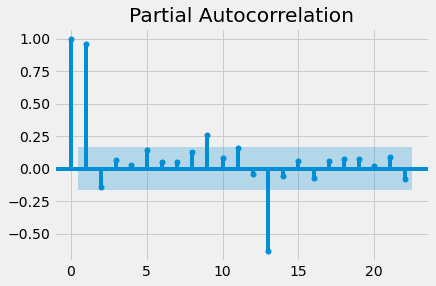

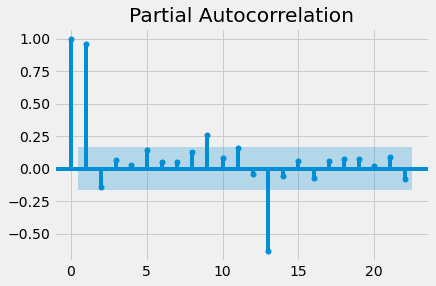

In [35]:
plot_pacf(ts_log)

In [36]:
import itertools

p=range(0,4)
d=range(1,2)
q=range(0,4)

In [37]:
pdq = list(itertools.product(p,d,q))
pdq = pdq[1:]

print('Using parameteres : {}'.format(pdq))

Using parameteres : [(0, 1, 1), (0, 1, 2), (0, 1, 3), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 1, 3), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 1, 3), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 1, 3)]


See the AIC/BIC file. 2,1,1 and 2,1,2 are the best fits. Now the AR Model.



/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Text(0.5, 1.0, 'RSS : 1.5023')

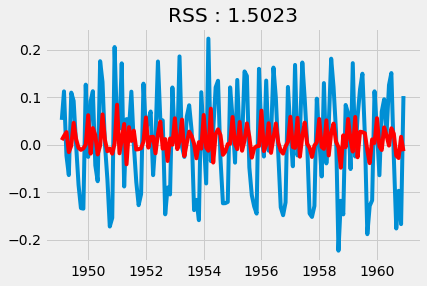

In [56]:
ar_model= ARIMA(ts_log, order=(2,1,0))
results_ar =ar_model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_ar.fittedvalues, color='red')
plt.title('RSS : %.4f' % sum((results_ar.fittedvalues-ts_log_diff)**2))

MA Model

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Text(0.5, 1.0, 'RSS : 1.4721')

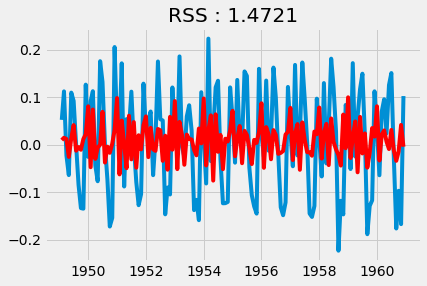

In [55]:
ma_model= ARIMA(ts_log, order=(0,1,2))
results_ma =ma_model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_ma.fittedvalues, color='red')
plt.title('RSS : %.4f' % sum((results_ma.fittedvalues-ts_log_diff)**2))

ARIMA model


/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warning

Text(0.5, 1.0, 'RSS : 1.0292')

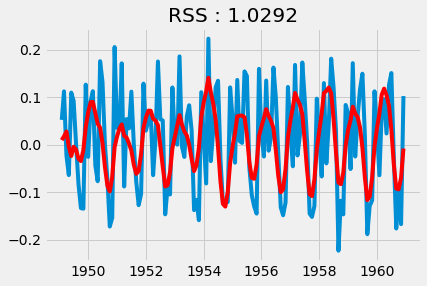

In [54]:
arima_model= ARIMA(ts_log, order=(2,1,2))
results_arima =arima_model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_arima.fittedvalues, color='red')
plt.title('RSS : %.4f' % sum((results_arima.fittedvalues-ts_log_diff)**2))

ARIMA has the best RSS value at 1.0292

In [63]:
predictions_arima_diff = pd.Series(results_arima.fittedvalues, copy=True)
predictions_arima_diff.head()

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64

In [64]:
predictions_arima_diff_cumsum = predictions_arima_diff.cumsum()
predictions_arima_diff.head()

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64

In [69]:
predictions_arima_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_arima_log = predictions_arima_log.add(predictions_arima_diff_cumsum, fill_value=0)
predictions_arima_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

Text(0.5, 1.0, 'RMSE: 90.1047')

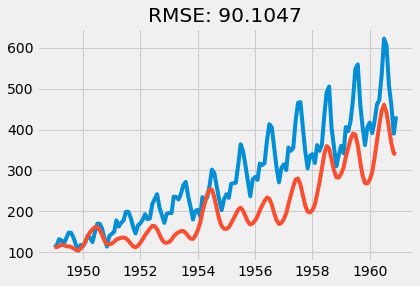

In [75]:
predictions_arima = np.exp(predictions_arima_log)
plt.plot(ts)
plt.plot(predictions_arima)
plt.title('RMSE: %.4f' % np.sqrt(sum((predictions_arima-ts)**2)/len(ts)))